<h1><font color = 'green' size = '10'>
<b>
Relationship between a Continuous and a Categorical Variable
</b>
</font>
</h1>

<h1>

<ul>
<font color = 'red brown' size = '6'>
<b>

<li>
A common way to view the relationship between two variables when one is categorical and the other is continuous is to use a bar plot or a box plot:
</li><br>

<ul>
<font color = 'red brown' size = '5'>
<li>
A bar plot helps compare the value of a variable for a discrete set of parameters and is one of the most common types of plots. Each bar represents a categorical value and the height of the bar usually represents an aggregated value of the continuous variable over that category (such as average, sum, or count of the values of the continuous variable in that category).
</li><br>

<li>
A box plot is a rectangle drawn to represent the distribution of the continuous
variable for each discrete value of the categorical variable. It not only allows us to visualize outliers efficiently but also allows us to compare the distribution of the continuous variable across categories of the categorical variable. The lower and upper edges of the rectangle represent the first and third quartiles, respectively, the line down through the middle represents the median value, and the points (or fliers) above and below the rectangle represent outlier values.
</li>
</font>
</ul>

</ul>
</b>
</font>
</ul>
</h1>

<h1><font color = 'green' size = '6'>
<b>
Exercise 1: Plotting a Bar Chart
</b>
</font>
</h1>

Let's visualize the total number of tsunamis created by earthquakes of each
intensity level using a bar chart.

1. Import the required libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Read the data. Use pandas' **.read_csv** method to read the CSV file into a pandas **DataFrame**:

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning Lectures/datasets/earthquake_data.csv")

In [ ]:
# display first five rowss od dataset
data.head()

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
0,338.0,No,1048.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,771.0,Tsu,1580.0,4.0,6.0,NaN,NaN,NaN,33.0,6.2,...,1.309,120,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,7889.0,Tsu,1757.0,7.0,15.0,NaN,NaN,NaN,NaN,NaN,...,-6.320,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6697.0,Tsu,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6013.0,Tsu,1668.0,4.0,13.0,NaN,NaN,NaN,NaN,NaN,...,-71.050,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3. Preprocess the **flag_tsunami** variable. Before we can use the **flag_tsunami** variable, we need to preprocess it to convert the **No** values to **zeros** and the **Tsu** values to **ones**. This will give us the binary target variable. To do this, we set the values in the column using the **.loc** operator, with : indicating that values need to be set for all rows, and the second parameter specifying the name of the column for which values are to be set:

In [ ]:
data.loc[:,'flag_tsunami'] = data.flag_tsunami.apply(lambda t:int(str(t) == 'Tsu'))
data.loc[:,'flag_tsunami']

<ipython-input-13-969310ed20c5>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,'flag_tsunami'] = data.flag_tsunami.apply(lambda t:int(str(t) == 'Tsu'))


0       0
1       1
2       1
3       1
4       1
       ..
6067    1
6068    0
6069    0
6070    0
6071    0
Name: flag_tsunami, Length: 6072, dtype: int64

4. Remove all rows having null **intensity** values from the data we want to plot:

In [ ]:
subset = data[~pd.isnull(data.intensity)][['intensity','flag_tsunami']]
subset

,intensity,flag_tsunami
4,4.0,1
5,8.0,1
7,10.0,1
8,10.0,1
12,10.0,0
...,...,...
6065,10.0,0
6066,10.0,1
6067,9.0,1
6068,5.0,0


5. Find the total number of tsunamis for each **intensity** level and display the DataFrame. To get the data in a format by means of which a bar plot can be
visualized, we will need to group the rows by each intensity level, and then sum
over the **flag_tsunami** values to get the total number of tsunamis for each
intensity level:

In [ ]:
data_to_plot = subset.groupby('intensity').sum()
data_to_plot

,flag_tsunami
intensity,
2.0,0
3.0,8
4.0,19
5.0,38
6.0,63
7.0,91
8.0,119
9.0,132
10.0,130


6. Plot the bar chart, using Matplotlib's **plt.bar(x=..., height=...)** method, which takes two arguments, one specifying the x values at which bars need to be drawn, and the second specifying the height of each bar. Both of these are one-dimensional data structures that must have the same length:

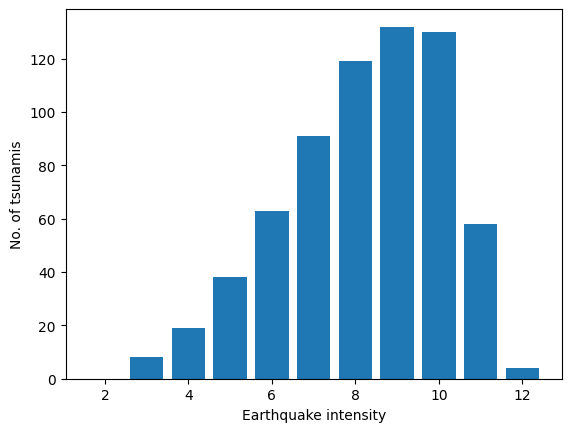

In [ ]:
plt.figure()
plt.bar(x=data_to_plot.index, height=data_to_plot.flag_tsunami)
plt.xlabel('Earthquake intensity')
plt.ylabel('No. of tsunamis')
plt.show()

<h1><font color = 'green' size = '6'>
<b>
Exercise 2: Visualizing a Box Plot
</b>
</font>
</h1>

In this exercise, we'll plot a box plot that represents the variation in **eq_primary** over those countries with at least 100 earthquakes.

1. Find countries with over 100 earthquakes. We will find the value counts for all the countries in the dataset. Then, we'll create a series comprising only those countries having a count greater than 100:

In [ ]:
country_counts = data.country.value_counts()
top_countries = country_counts[country_counts > 100]
top_countries

CHINA          590
JAPAN          403
INDONESIA      379
IRAN           377
ITALY          325
TURKEY         321
USA            260
GREECE         260
PHILIPPINES    210
MEXICO         198
CHILE          193
PERU           180
RUSSIA         149
Name: country, dtype: int64

2. Subset the DataFrame to filter in only those rows having countries in the preceding set. To filter the rows, we use the **.isin()** method on the pandas series to select those rows containing a value in the array-like object passed as a parameter:

In [ ]:
subset = data[data.country.isin(top_countries.index)]
subset

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
3,6697.0,1,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6013.0,1,1668.0,4.0,13.0,NaN,NaN,NaN,NaN,NaN,...,-71.050,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5828.0,1,1755.0,11.0,18.0,9.0,11.0,35.0,NaN,7.0,...,-70.300,150,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
6,5927.0,1,1788.0,8.0,6.0,NaN,NaN,NaN,NaN,8.0,...,-161.000,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7058.0,1,1811.0,12.0,16.0,13.0,15.0,NaN,NaN,7.0,...,-90.400,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6059,1328.0,0,1754.0,5.0,15.0,21.0,NaN,NaN,NaN,NaN,...,120.993,170,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.0
6060,2073.0,1,1863.0,6.0,3.0,11.0,20.0,NaN,NaN,6.5,...,121.000,170,2000.0,4.0,NaN,4.0,2000.0,4.0,NaN,4.0
6061,4739.0,1,1976.0,8.0,16.0,16.0,11.0,7.3,33.0,8.0,...,124.090,170,3500.0,4.0,134.0,4.0,10000.0,4.0,134.0,4.0
6062,5253.0,0,1990.0,7.0,16.0,7.0,26.0,34.6,25.0,7.8,...,121.172,170,3000.0,4.0,369.6,4.0,3000.0,4.0,369.6,4.0


3. Create and display the box plot. The primary command for plotting the data is **sns.boxplot(x=..., y=..., data=..., order=)**. The x and y parameters are
the names of the columns in the DataFrame to be plotted on each axis. The dataparameter takes the DataFrame from which to take the data and order takes a list of category names that indicates the order in which to display the categories on the X axis:

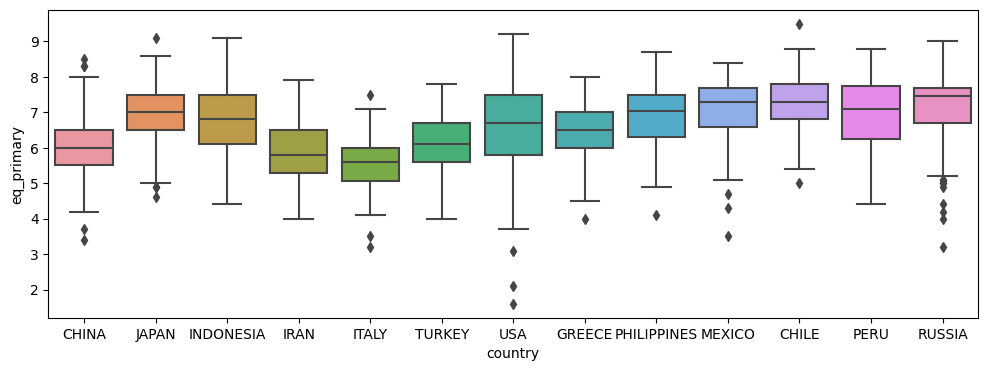

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='country', y="eq_primary", data=subset, order=top_countries.index)
plt.show()